In [5]:
import numpy as np
import cv2 
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
img=cv2.imread(r"C:\Users\LENOVO\Downloads\Who was Dwayne Johnson's famous dad and what happened to him_.jpeg")
img.shape

(1226, 736, 3)

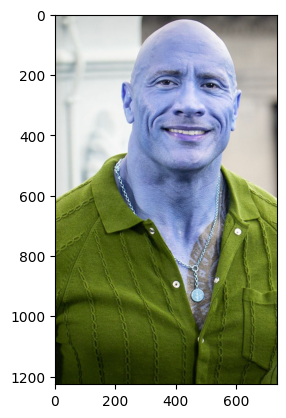

In [7]:
plt.imshow(img)

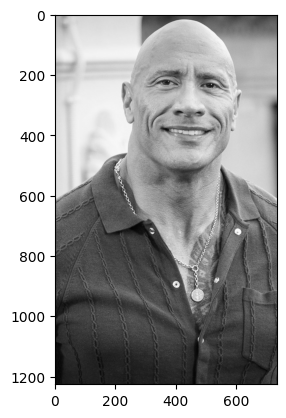

In [8]:
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

In [9]:
eye_cascade = cv2.CascadeClassifier(
    r"C:\Users\LENOVO\Desktop\Celebrity Classifier model\Model\haarcascade_eye.xml"
)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")


faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[209,  48, 462, 462]], dtype=int32)

In [10]:
faces

array([[209,  48, 462, 462]], dtype=int32)

In [11]:
(x,y,w,h)=faces[0]
x,y,w,h

(np.int32(209), np.int32(48), np.int32(462), np.int32(462))

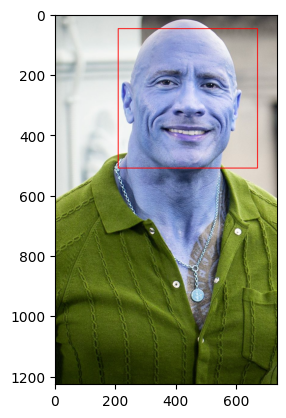

In [12]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

In [13]:
eye_detect = cv2.CascadeClassifier(
    r"C:\Users\LENOVO\Downloads\haarcascade_eye.xml"
)
if eye_detect.empty():
    print("Error: Eye cascade not loaded!")


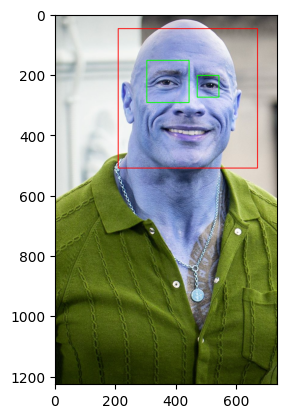

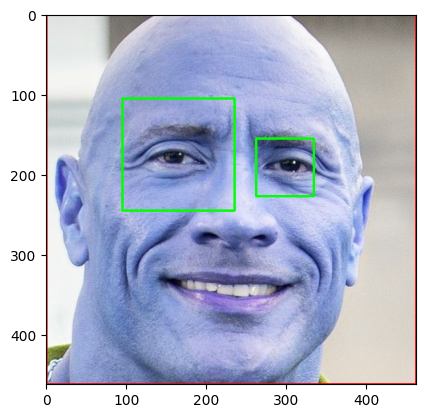

In [14]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray= gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_detect.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()
%matplotlib inline
plt.imshow(roi_color, cmap='gray')


In [23]:
cropped_img = np.array(roi_color)
cropped_img.shape

(462, 462, 3)

In [24]:
def get_cropped_image_if_2_eyes(image_path):

    # DEBUG — see what path we are reading
    print("Attempting to read:", image_path)

    img = cv2.imread(image_path)

    # If image cannot be read, skip it
    if img is None:
        print("ERROR: Unable to read image:", image_path)
        return None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    if len(faces) == 0:
        print("No face detected in:", image_path)
        return None

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]

        eyes = eye_cascade.detectMultiScale(roi_gray)

        if len(eyes) >= 2:
            return roi_color

        else:
            print("Eyes not detected in:", image_path)

    return None


In [25]:
#above fn return crop img if pic is  not blur and has 2 eyes
#cropped_image = get_cropped_image_if_2_eyes('./test_images/sharapova1.jpg')
#plt.imshow(cropped_image)

In [26]:
path_to_data="./dataset/"
path_to_cr_data="./dataset/cropped/"

In [27]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [28]:
img_dirs

['./dataset/Cristiano ronaldo',
 './dataset/cropped',
 './dataset/dwayne johnson',
 './dataset/john cena',
 './dataset/scarlett johansson',
 './dataset/virat kohli']

In [29]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [33]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = os.path.basename(img_dir)
    print("\nProcessing:", celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):

        # 1. Skip directories
        if entry.is_dir():
            print("Skipping directory:", entry.path)
            continue

        # 2. Skip non-image files
        if not entry.path.lower().endswith((".jpg", ".jpeg", ".png", ".jfif")):
            print("Skipping non-image:", entry.path)
            continue

        # 3. Process only real images
        roi_color = get_cropped_image_if_2_eyes(entry.path)

        if roi_color is not None:

            cropped_folder = os.path.join(path_to_cr_data, celebrity_name)

            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder:", cropped_folder)

            cropped_file_name = f"{celebrity_name}_{count}.png"
            cropped_file_path = os.path.join(cropped_folder, cropped_file_name)

            cv2.imwrite(cropped_file_path, roi_color)

            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1



Processing: Cristiano ronaldo
Attempting to read: ./dataset/Cristiano ronaldo\#cr7.jpeg
Generating cropped images in folder: ./dataset/cropped/Cristiano ronaldo
Skipping directory: ./dataset/Cristiano ronaldo\.ipynb_checkpoints
Attempting to read: ./dataset/Cristiano ronaldo\10 Biggest Contracts in Sports History [Ranked].jpg
No face detected in: ./dataset/Cristiano ronaldo\10 Biggest Contracts in Sports History [Ranked].jpg
Attempting to read: ./dataset/Cristiano ronaldo\2Q== (1) - Copy.jpg
Eyes not detected in: ./dataset/Cristiano ronaldo\2Q== (1) - Copy.jpg
Attempting to read: ./dataset/Cristiano ronaldo\2Q== - Copy.jpg
No face detected in: ./dataset/Cristiano ronaldo\2Q== - Copy.jpg
Attempting to read: ./dataset/Cristiano ronaldo\5+ Hundred Cristiano Ronaldo Face - Copy.jpg
Eyes not detected in: ./dataset/Cristiano ronaldo\5+ Hundred Cristiano Ronaldo Face - Copy.jpg
Attempting to read: ./dataset/Cristiano ronaldo\50+ Free Ronaldo 2008 & Ronaldo Images - Pixabay.jpg
No face detect

<b><h2>(3) Preprocessing: Use wavelet transform as a feature for traning our model<b></h2>

<b>In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc</b>

In [34]:
import sys
print(sys.executable)


C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\python.exe


In [35]:
import sys
!"{sys.executable}" -m pip install PyWavelets




[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [36]:
!pip install PyWavelets


Defaulting to user installation because normal site-packages is not writeable


In [37]:
import pywt


In [38]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

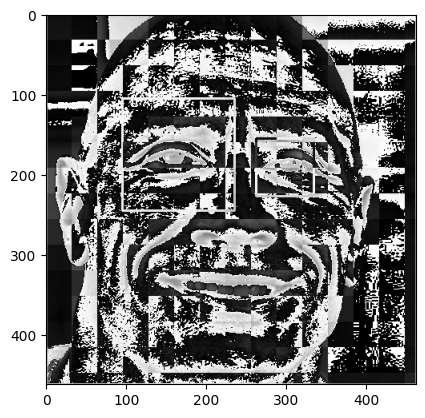

In [39]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

<b>You can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier</b>

In [40]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Cristiano ronaldo': ['./dataset/cropped/Cristiano ronaldo\\Cristiano ronaldo_1.png',
  './dataset/cropped/Cristiano ronaldo\\Cristiano ronaldo_10.png',
  './dataset/cropped/Cristiano ronaldo\\Cristiano ronaldo_11.png',
  './dataset/cropped/Cristiano ronaldo\\Cristiano ronaldo_12.png',
  './dataset/cropped/Cristiano ronaldo\\Cristiano ronaldo_13.png',
  './dataset/cropped/Cristiano ronaldo\\Cristiano ronaldo_14.png',
  './dataset/cropped/Cristiano ronaldo\\Cristiano ronaldo_15.png',
  './dataset/cropped/Cristiano ronaldo\\Cristiano ronaldo_16.png',
  './dataset/cropped/Cristiano ronaldo\\Cristiano ronaldo_17.png',
  './dataset/cropped/Cristiano ronaldo\\Cristiano ronaldo_18.png',
  './dataset/cropped/Cristiano ronaldo\\Cristiano ronaldo_19.png',
  './dataset/cropped/Cristiano ronaldo\\Cristiano ronaldo_2.png',
  './dataset/cropped/Cristiano ronaldo\\Cristiano ronaldo_20.png',
  './dataset/cropped/Cristiano ronaldo\\Cristiano ronaldo_21.png',
  './dataset/cropped/Cristiano ronaldo\\Cri

In [41]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Cristiano ronaldo': 0,
 'dwayne johnson': 1,
 'john cena': 2,
 'scarlett johansson': 3,
 'virat kohli': 4}

<h3>Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now<h3>

In [43]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [44]:
len(X[0])


4096

In [45]:

X[0]

array([[  8],
       [164],
       [197],
       ...,
       [215],
       [ 36],
       [ 81]], shape=(4096, 1), dtype=uint8)

In [46]:
y[0]

0

In [47]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(160, 4096)

<h2>Data cleaning process is done. Now we are ready to train our model</h2>
<br>
   <b> We will use SVM with rbf kernel tuned with heuristic finetuning</b>

In [69]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.725

In [71]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.46      0.86      0.60         7
           1       0.89      0.73      0.80        11
           2       1.00      0.20      0.33         5
           3       0.80      0.86      0.83        14
           4       1.00      0.67      0.80         3

    accuracy                           0.72        40
   macro avg       0.83      0.66      0.67        40
weighted avg       0.81      0.72      0.72        40



In [72]:
len(X_test)

40

In [73]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [74]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [75]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Pyth

,model,best_score,best_params
0,svm,0.750000,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.608333,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.716667,{'logisticregression__C': 1}


In [76]:
best_estimators['svm'].score(X_test,y_test)

0.75

In [77]:
best_estimators['random_forest'].score(X_test,y_test)  

0.425

In [78]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8

In [79]:

best_clf = best_estimators['svm']

In [80]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 6,  0,  0,  1,  0],
       [ 2,  8,  0,  1,  0],
       [ 2,  1,  2,  0,  0],
       [ 2,  0,  1, 11,  0],
       [ 0,  0,  0,  0,  3]])

Text(95.72222222222221, 0.5, 'Truth')

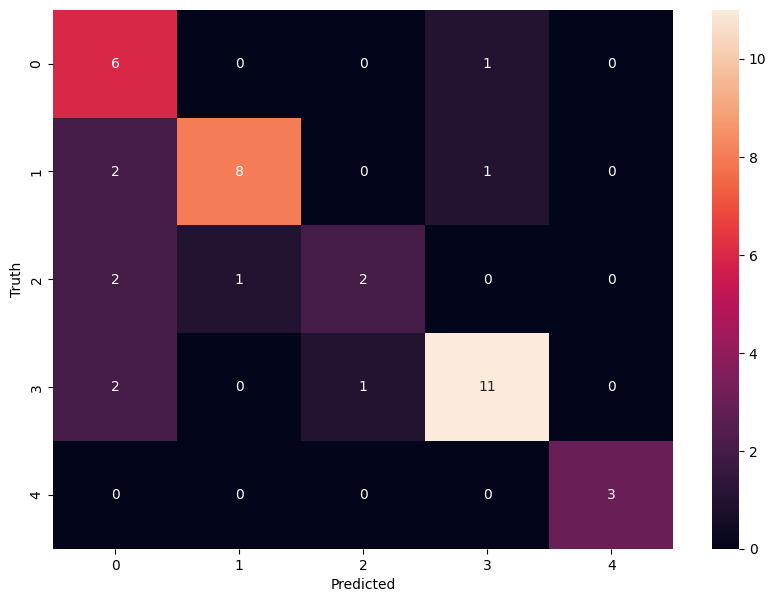

In [81]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [82]:
class_dict

{'Cristiano ronaldo': 0,
 'dwayne johnson': 1,
 'john cena': 2,
 'scarlett johansson': 3,
 'virat kohli': 4}

<h3>saving the model</h3>

In [83]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

Defaulting to user installation because normal site-packages is not writeable


['saved_model.pkl']

In [84]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [87]:
import pickle
pickle.dump(best_clf, open("saved_model.pkl", "wb"))
